In [111]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
import numpy as np
import matplotlib.pyplot as plt
import patoolib
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import seaborn as sns

In [113]:
patoolib.extract_archive('/content/Data.zip')

patool: Extracting /content/Data.zip ...
patool: running /usr/bin/7z x -o./Unpack_zipha9y2 -- /content/Data.zip
patool: ... /content/Data.zip extracted to `Data3' (local file exists).


'Data3'

In [114]:
#array of shape (2400, 784) plus extra dimenssion for least square (extra column of ones)
images = np.ones([2400,785])

Least Square Method Formula

w= (X`transpose *X`)-1X`transpose*t

In [115]:
path = "/content/Data/Train/"
XteldaTrain = np.ones([2400,785])
i=0
while(i<2400):
    curr = i+1
    PATHNEW = path + str(curr) + ".jpg"
    New_image = Image.open(PATHNEW)
    image = np.asarray(New_image).flatten()
    image = np.append(image, [1])
    XteldaTrain[i] =  image
    i+=1

path = "/content/Data/Test/"
XteldaTest = np.ones([200,785])
i=0
while(i<200):
    curr = i+1
    PATHNEW = path + str(curr) + ".jpg"
    New_image = Image.open(PATHNEW)
    TestImage = np.asarray(New_image).flatten()
    TestImage = np.append(TestImage, [1])
    XteldaTest[i] =  TestImage
    i+=1    

In [116]:
def getTargetValue(index):
  list = [-1]*2400
  for i in range(240):
    list[(index*240)+i] = 1 
  return list

#test = getTargetValue(9)


(XT*X)-1*X

In [117]:
Xtranspose = XteldaTrain.transpose()
W = (np.linalg.pinv(Xtranspose.dot(XteldaTrain))).dot(Xtranspose)


In [118]:
i=0
WX = []
while i < 10:
  WX.append(W.dot(getTargetValue(i)))
  i = i+1

#WX[0] 
#XteldaTest[199]

In [119]:
Prediction = []
Max = []
i=0
while i < 200:
  j=0
  while j < 10:
     YX = WX[j].transpose().dot(XteldaTest[i])
     Max.append(YX)
     j = j+1
  
  MaxValue = np.argmax(Max)
  Max.clear()
  Prediction.append(MaxValue)
  i = i+1 


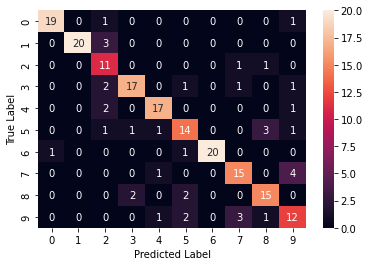

In [133]:
Labels = np.genfromtxt("/content/Data/Test/Test Labels.txt", delimiter = ",")
Confusion = confusion_matrix(Prediction, Labels)
sns.heatmap(Confusion, annot = True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('Confusion')